17
18
[[ 1.90490508e-17 -5.73677135e-02  1.17336857e-01  3.17018539e-03
   5.97737022e-02  1.80115490e-02  1.45254033e-01  2.53207477e-02
  -1.00292443e-01 -6.47049078e-03  6.86241867e-03  9.62538284e-02
   5.10706068e-03  8.51834585e-04  2.98261920e-03  5.01629212e-01
   8.16976274e-02]] [0.01457514 0.01399538 0.01344552 ... 0.00192058 0.00192055 0.00192052]
training error % = 0.3841044251421731
training accuracy %=99.61589557485783


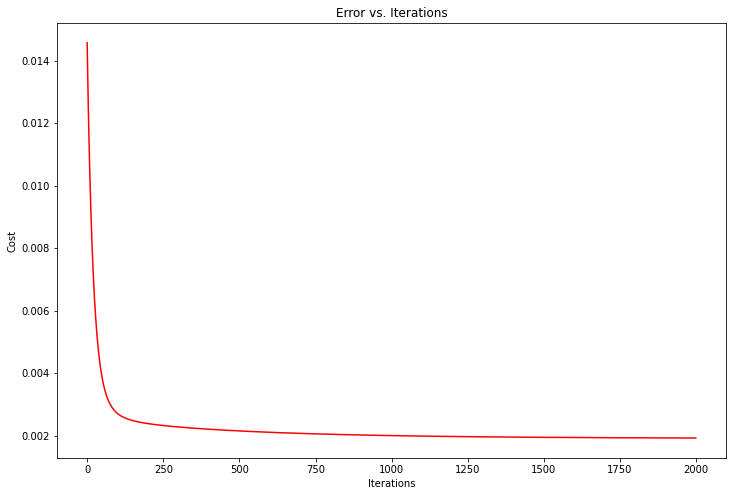

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
raw_data = pd.read_csv('https://raw.githubusercontent.com/stutisehgal/MachineLearning/0d077bf91dcade8ecba67d7a2c0789f48cc15537/Multiple%20Linear%20Regression/chennai_house_multivariate_train.csv')
raw_data.head()
raw_data.describe()
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()
data.min()
data.max()
data.shape
cols = data.shape[1]
print (cols)
data.insert(0, 'Ones', 1)
data.head()
cols = data.shape[1]
print (cols)
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
x = np.matrix(x)
y = np.matrix(y)
params = x.shape[1]
theta = np.matrix(np.array(np.zeros(params)))
x.shape, theta.shape, y.shape
def computeError(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    
    return np.sum(inner) / (2 * len(x))
    computeError(x, y, theta)
Learn_rate=0.15
iters =2000
def gradientDescent(x, y, theta, Learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate/ len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeError(x, y, theta)
        
    return theta, cost

new_theta, cost = gradientDescent(x, y, theta, Learn_rate, iters)
print(new_theta, cost)
computeError(x, y, new_theta)
Model_price =  x*new_theta.T

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

import math
erro_r = [np.power((b-a),2) for (a, b) in zip(Model_price, y)] #mean absolute percentage error
error0 = np.sum(erro_r)

error=(error0/len(y))*100

print("training error % = {}".format(error))
accuracy= 100 - error
print("training accuracy %={}".format(accuracy))

In [3]:
t_raw_data = pd.read_csv('https://raw.githubusercontent.com/stutisehgal/MachineLearning/0d077bf91dcade8ecba67d7a2c0789f48cc15537/Multiple%20Linear%20Regression/chennai_house_multivariate_test.csv')
t_raw_data.head()
t_data=(t_raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
t_data.insert(0, 'Ones', 1)
t_data.head()
t_cols = t_data.shape[1]
print (t_cols)
t_x=t_data.iloc[:,0:t_cols-1]
t_y=t_data.iloc[:,t_cols-1:t_cols]
t_x.shape
t_x = np.matrix(t_x)
t_y = np.matrix(t_y)
Model_testdata_price =  t_x*new_theta.T
test_error = [np.power((b-a),2) for (a, b) in zip(Model_testdata_price, t_y)] #mean absolute percentage error
error = np.sum(test_error)

error=(error/len(y))*100

print("test error % = {}".format(error))
accuracy= 100 - error
print("test accuracy %={}".format(accuracy))

18
test error % = 0.06609677414719763
test accuracy %=99.9339032258528
